In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [16]:
df = pd.read_csv('C:\\Users\\dkdud\\Desktop\\2017.csv', encoding = 'utf-8')
df.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [47]:
# EDA
df.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [48]:
df.isnull().sum()

# null 없고 이상치도 없는 것으로 확인

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [45]:
scaler = preprocessing.StandardScaler()
df_number = df.iloc[:, 2:]
# Happiness score부터 인덱싱
scaled_df = scaler.fit_transform(df_number)
scaled_df = pd.DataFrame(scaled_df, columns=['Happiness.Score', 'Whisker.high', 'Whisker.low', 'ec', 'fa', 'he', 'f', 'g', 't', 'd'])

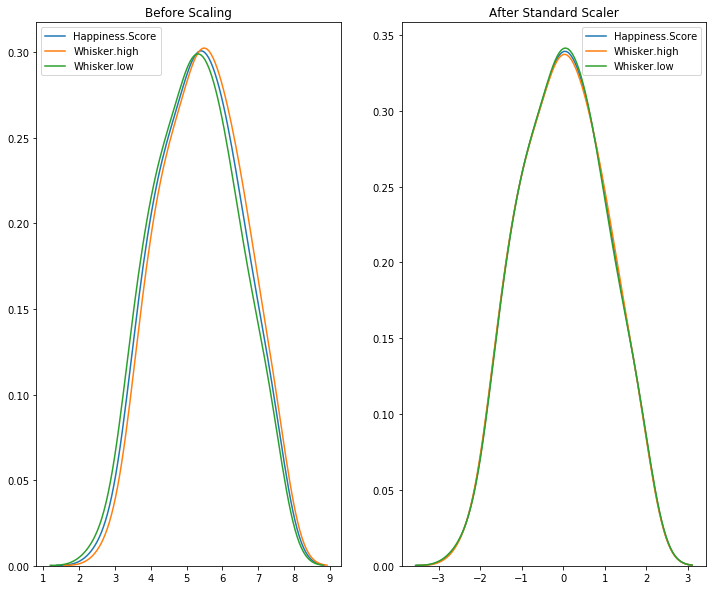

In [44]:
# 3개 칼럼만 비교
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 10))

ax1.set_title('Before Scaling')
sns.kdeplot(df['Happiness.Score'], ax=ax1)
sns.kdeplot(df['Whisker.high'], ax=ax1)
sns.kdeplot(df['Whisker.low'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['Happiness.Score'], ax=ax2)
sns.kdeplot(scaled_df['Whisker.high'], ax=ax2)
sns.kdeplot(scaled_df['Whisker.low'], ax=ax2)
plt.show()

In [69]:
# happiness score와 economy 변수 선택
X = scaled_df.loc[:, ['Happiness.Score', 'ec']].values
X

array([[ 1.93599602,  1.50618765],
       [ 1.92269283,  1.18651768],
       [ 1.90672969,  1.1823454 ],
       [ 1.89786089,  1.38344191],
       [ 1.87568934,  1.09398544],
       [ 1.79409831,  1.23792427],
       [ 1.74000003,  1.17893937],
       [ 1.73822644,  1.00370674],
       [ 1.71162049,  1.21513788],
       [ 1.71162049,  1.19136213],
       [ 1.64865341,  0.93141005],
       [ 1.52981447,  0.29799288],
       [ 1.46507381,  1.19775726],
       [ 1.45354464,  1.3388096 ],
       [ 1.43935508,  1.31365029],
       [ 1.41629672,  1.19972687],
       [ 1.36308482,  1.14216675],
       [ 1.33825288,  1.80535433],
       [ 1.20611117,  1.08936495],
       [ 1.15112567,  0.63911598],
       [ 1.14757807,  1.5297437 ],
       [ 1.13604932,  0.29238275],
       [ 1.11299097,  0.87728922],
       [ 1.10412217,  0.47821036],
       [ 1.08549822,  0.40165073],
       [ 1.08017703,  1.6869423 ],
       [ 1.04026831,  0.85487202],
       [ 0.97552765,  0.55513378],
       [ 0.97552765,

In [60]:
from sklearn.cluster import KMeans

In [70]:
score=[]

In [71]:
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    score.append(kmeans.inertia_)

In [72]:
score

[310.0,
 114.58129155267002,
 63.604594110939935,
 49.62313291404205,
 40.27972862297058,
 33.368882309244015,
 28.697167829486386,
 25.54572834454165,
 22.528818818502465,
 20.02176155364115]

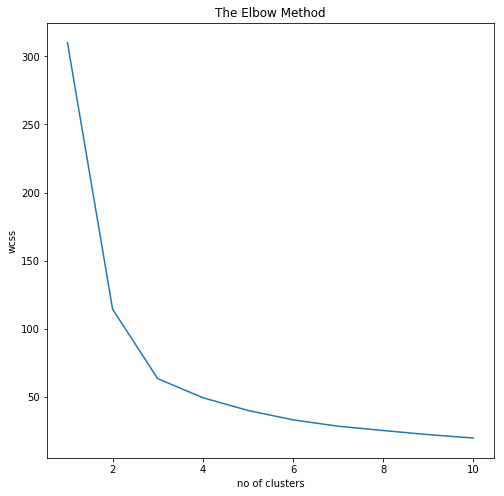

In [73]:
plt.figure(figsize=(8, 8))
plt.plot(range(1,11), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

적정 k값은 3

In [74]:
kmeansmodel = KMeans(n_clusters=3, init='k-means++', random_state=0)
y_kmeans = kmeansmodel.fit_predict(X)

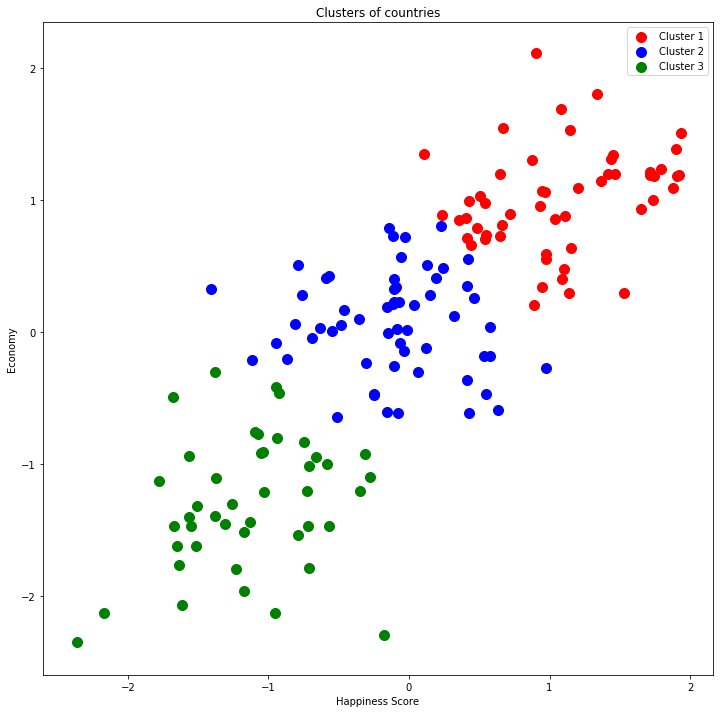

In [76]:
plt.figure(figsize=(12, 12))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of countries')
plt.xlabel('Happiness Score')
plt.ylabel('Economy')
plt.legend()
plt.show()

In [78]:
# 선형관계 나타나서 다른 변수 선택 - 'trust government'
X = scaled_df.loc[:, ['Happiness.Score', 't']].values
score=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    score.append(kmeans.inertia_)
score

[310.0,
 152.19635511518436,
 87.56815259484206,
 70.27768441555187,
 55.78784991358941,
 47.78559402006541,
 41.4750109139199,
 34.9190406294353,
 30.151934831223564,
 26.178866326536827]

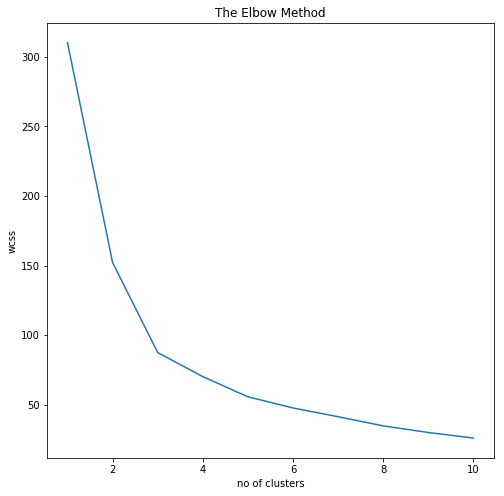

In [79]:
plt.figure(figsize=(8, 8))
plt.plot(range(1,11), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

역시 적정 k값 3

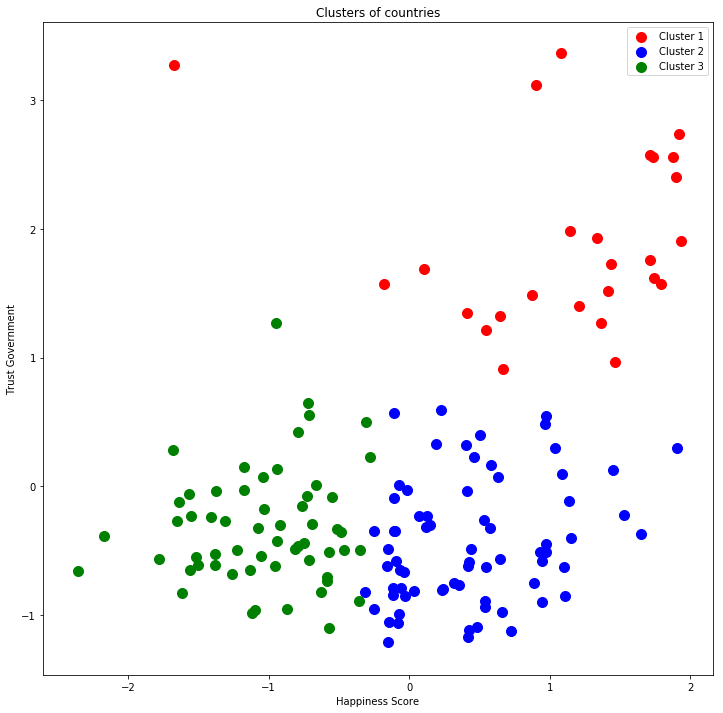

In [80]:
kmeansmodel = KMeans(n_clusters=3, init='k-means++', random_state=0)
y_kmeans = kmeansmodel.fit_predict(X)
plt.figure(figsize=(12, 12))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of countries')
plt.xlabel('Happiness Score')
plt.ylabel('Trust Government')
plt.legend()
plt.show()

국가들이 세 군집으로 나누어진다 (행복지수와 정부에 대한 신뢰도 모두 높은 국가 / 행복지수는 높지만 정부에 대한 신뢰도는 낮은 국가 / 행복지수와 정부에 대한 신뢰도 모두 낮은 국가)


행복지수가 높은 국가에서는 정부에 대한 신뢰도가 고르게 분포하지만 행복지수가 낮은 국가에서는 대체로 정부에 대한 신뢰도가 낮다.